In [1]:
#Workbench imports
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from workbench_version import * #load the model

In [2]:
#### LOAD SLR SCENARIOS ####
# Load all SLR_Scenario
for filename in os.listdir("SLR_projections"):
    if filename.endswith(".csv"):
        obj = SLR_Scenario(filename.split('.')[0]) #Init object with name derived from filename
        obj.from_csv(os.path.join('SLR_projections',filename)) #Fill the object with data from the csv file

# Load all SurgeHeight (Realisations of extreme value distribution)
for filename in os.listdir("SurgeHeight"):
    if filename.endswith(".csv"):
        obj = SurgeHeight(filename.split('.')[0]) #Init object with name derived from filename
        obj.from_csv(os.path.join('SurgeHeight',filename)) #Fill the object with data from the csv file

# Create SurgeLevels by summing combinations of SLR_Scenario and SurgeHeights
for SLR_Scenario in allSLR_Scenario:
    for SurgeHeight in allSurgeHeight:
        combine_SurgeLevel(SLR_Scenario,SurgeHeight)
        #Adds all it's info to allSurgeLevel
        
# Print all available SLR scenarios
#for SLR_Scenario in allSLR_Scenario:
#    print(SLR_Scenario.name,end=' ||| ')

In [3]:
#### LOAD ADAPTATION STRATEGIES ####
from mayors import *
allMayors = [Kroket(),Economicus(),Sentiment(),Lawkeeper()]

In [4]:
selectedSurgeLevel = [l for l in allSurgeLevel if l.name.startswith('Bamber')]

In [5]:
from ema_workbench import(RealParameter,ScalarOutcome, Constant, BooleanParameter, CategoricalParameter,
                          Model)

model = Model('Rotty',function=run_model_workbench)

model.uncertainties = [CategoricalParameter('SurgeLevel',categories=selectedSurgeLevel)]

model.levers = [CategoricalParameter('Mayor',categories=allMayors)]

model.outcomes = [ScalarOutcome('Area_A_trust_2120'),
                  ScalarOutcome('Area_A_FPL2100to2120'),
                  ScalarOutcome('Area_B_trust_2120'),
                  ScalarOutcome('Area_B_FPL2100to2120')]

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [6]:
from ema_workbench import(ema_logging, perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

experiments, outcomes = perform_experiments(models=model,scenarios=100,policies=4)

[MainProcess/INFO] performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished


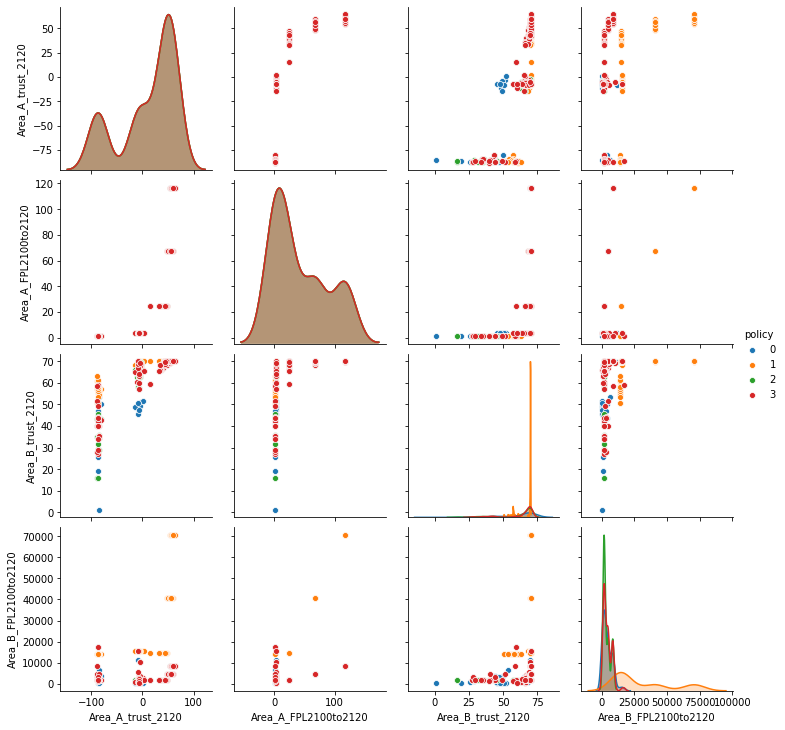

In [7]:
policies = experiments['policy']
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies


sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()

[MainProcess/INFO] no time dimension found in results


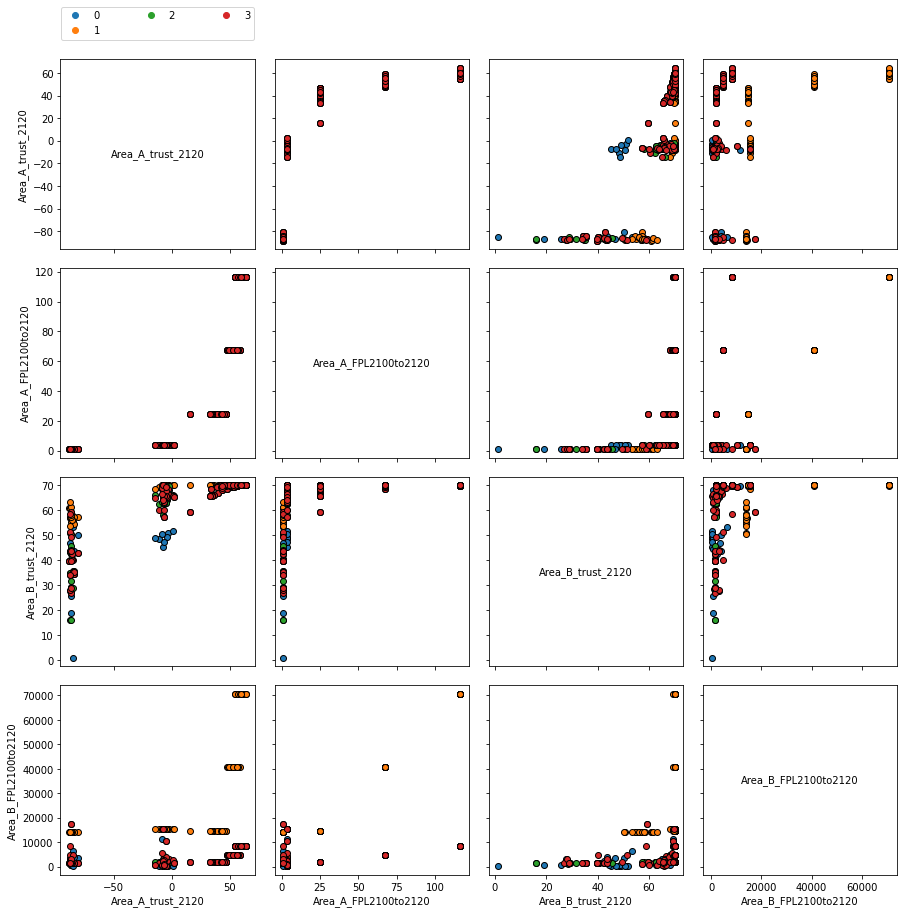

In [13]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=True)
fig.set_size_inches(15,15)
plt.show()

[MainProcess/INFO] no time dimension found in results


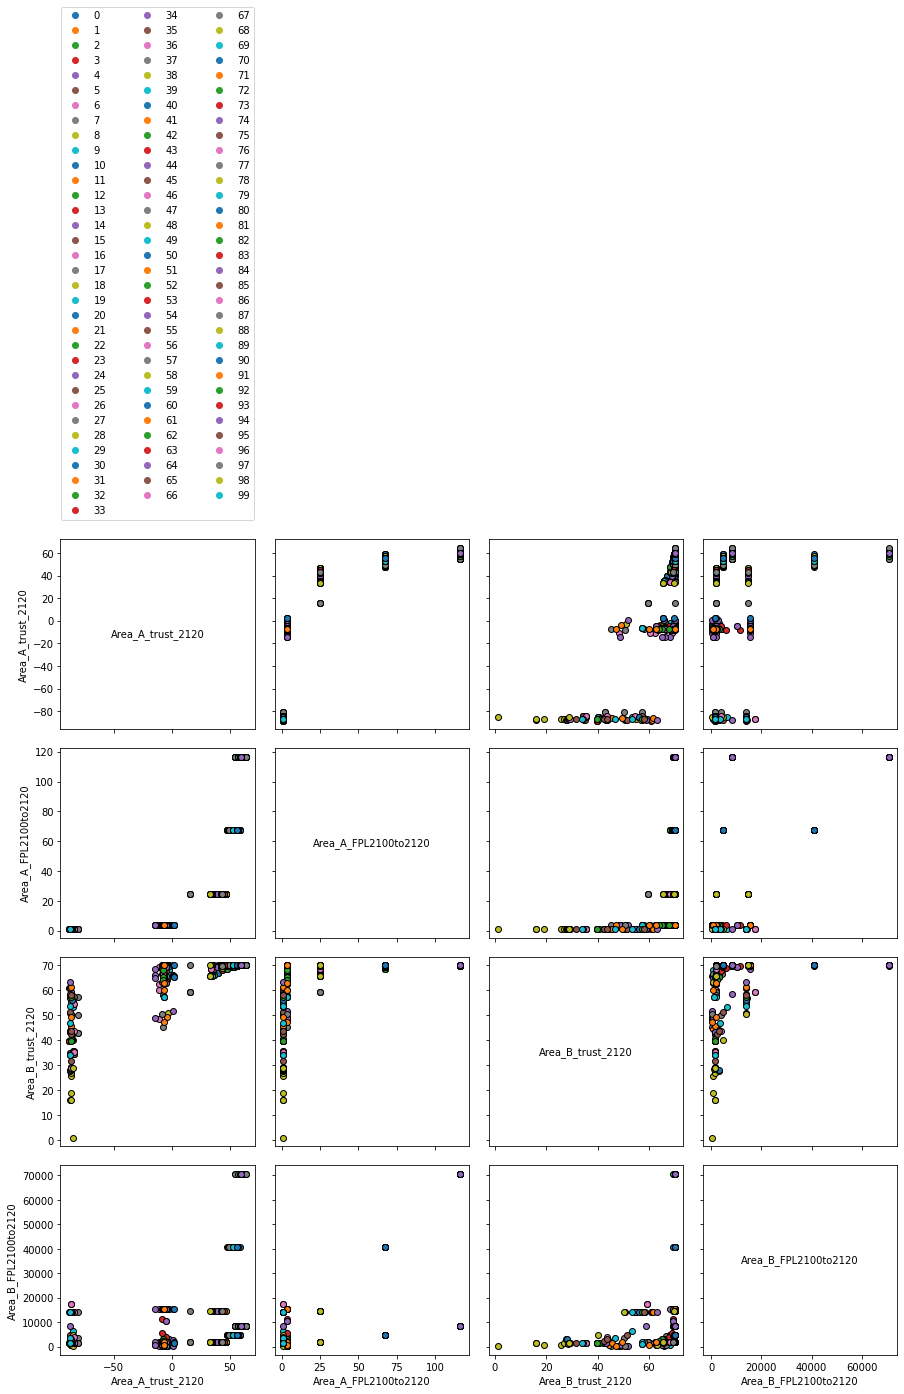

In [15]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='scenario',
                                         legend=True)
fig.set_size_inches(15,15)
plt.show()